In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
f1 = [1,2,3,4]
f2 = [5,7,8,9]
f3 = [0,0,0,0]
f4 = [1,1,1,1]
data = list(zip(f1,f2,f3,f4))
df = pd.DataFrame(data,columns=['f1','f2','f3','f4'])
df

,f1,f2,f3,f4
0,1,5,0,1
1,2,7,0,1
2,3,8,0,1
3,4,9,0,1


In [ ]:
df.var()

f1    1.666667
f2    2.916667
f3    0.000000
f4    0.000000
dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thresh = VarianceThreshold(threshold=0)

In [ ]:
var_thresh

VarianceThreshold(threshold=0)

In [ ]:
var_thresh.fit(df)

VarianceThreshold(threshold=0)

In [ ]:
var_thresh.get_support()

array([ True,  True, False, False])

In [ ]:
df.columns[var_thresh.get_support()]

Index(['f1', 'f2'], dtype='object')

### Feature Selection using Correlation

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
df = load_boston()
x = pd.DataFrame(df.data, columns = df.feature_names)
y = df.target

In [ ]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

x_train.shape, x_test.shape

((354, 13), (152, 13))

In [ ]:
cor = x_train.corr()

<AxesSubplot:>

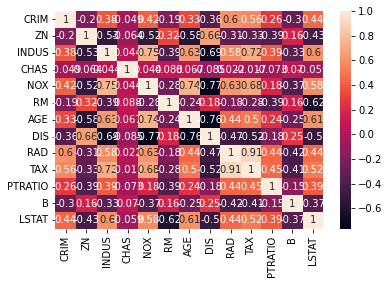

In [ ]:
sns.heatmap(cor,annot = True)

<AxesSubplot:>

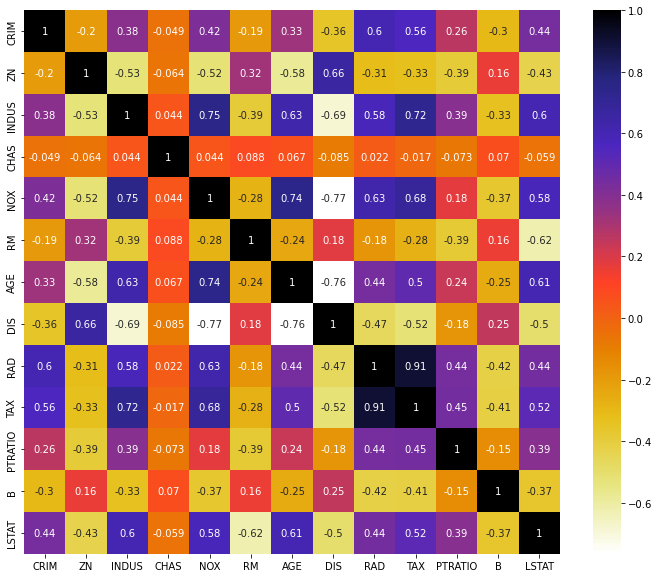

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [ ]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

4

In [ ]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [ ]:
x_train.drop(corr_features, axis = 1)
x_test.drop(corr_features, axis = 1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54
